Linear Regression: Canada per Capita Income

In [16]:
import pandas as pd 

data = pd.read_csv("input/canada_per_capita_income.csv")

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Test Train data split

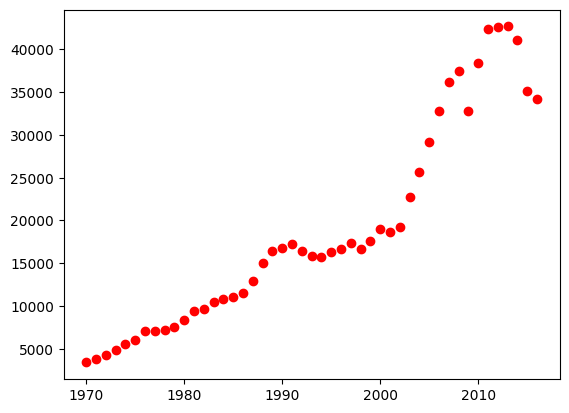

In [17]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

X = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values

x_train , x_test , y_train , y_test = train_test_split( X , y , test_size=1/3 , random_state=0)
plt.scatter(X,y,color='red')

Model Training

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

model = lr.fit(x_train , y_train)
y_predict = model.predict(x_test)

r2_score(y_test , y_predict)
model.score(x_test , y_test)

0.7738073013924118

Predictions 

In [25]:
model.predict([[2020]])

array([42960.57691526])

Model Graph

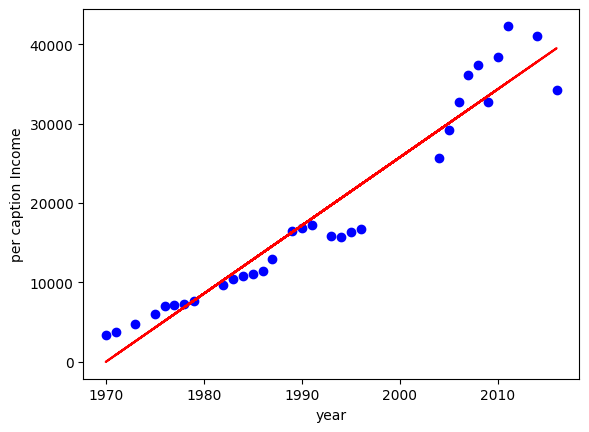

In [24]:
plt.scatter(x_train , y_train , color='blue')
plt.plot(x_train , model.predict(x_train) , color='red')
plt.xlabel('year')
plt.ylabel('per caption Income')
plt.show()

Multi Variate Regression Model

In [37]:
import pandas as pd 

data = pd.read_csv("input/hiring.csv")
data.info()
data.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


Cleaning the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

data['test_score(out of 10)'].fillna(8.0, inplace=True)
data['experience'].fillna(0, inplace=True)

data.replace('five', 5, inplace=True)

data.replace('two', 2, inplace=True)
data.replace('seven', 7, inplace=True)
data.replace('three', 3, inplace=True)
data.replace('ten', 10, inplace=True)
data.replace('eleven',11, inplace=True)

data



,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


Data Splitting

In [89]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:3]
y = data.iloc[:, 3]

x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=1/3 , random_state=1)

Model Training

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
model = lr.fit(x_train , y_train)

y_predict = model.predict(x_test)
r2_score(y_test , y_predict)
model.score(x_test , y_test)

0.9497105706841057

Predictions

In [91]:
model.predict([[2,9,6]])

C:\Users\Abdul Muizz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54565.2173913])

In [92]:
model.predict([[12,10,10]])

C:\Users\Abdul Muizz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([90869.56521739])